In [1]:
from pv_simulator import pv_simulator

In [2]:
## Mocked data from producer

headers = ['date','measurement']

data = [
['2019-10-01T00:15:00',6539],
['2019-10-01T00:30:00',3595],
['2019-10-01T00:45:00',8522],
['2019-10-01T01:00:00',5583],
['2019-10-01T01:15:00',8202],
['2019-10-01T01:30:00',2598],
['2019-10-01T01:45:00',242],
['2019-10-01T02:00:00',3387],
['2019-10-01T02:15:00',523],
['2019-10-01T02:30:00',1437],
['2019-10-01T02:45:00',266],
['2019-10-01T03:00:00',1064],
['2019-10-01T03:15:00',8760],
['2019-10-01T03:30:00',5747],
['2019-10-01T03:45:00',7239],
['2019-10-01T04:00:00',7360],
['2019-10-01T04:15:00',8051],
['2019-10-01T04:30:00',4160],
['2019-10-01T04:45:00',2576],
['2019-10-01T05:00:00',4099],
['2019-10-01T05:15:00',4150],
['2019-10-01T05:30:00',6882],
['2019-10-01T05:45:00',4085],
['2019-10-01T06:00:00',1383],
['2019-10-01T06:15:00',1455],
['2019-10-01T06:30:00',776],
['2019-10-01T06:45:00',7200],
['2019-10-01T07:00:00',8628],
['2019-10-01T07:15:00',4198],
['2019-10-01T07:30:00',741],
['2019-10-01T07:45:00',5816],
['2019-10-01T08:00:00',4598],
['2019-10-01T08:15:00',4367],
['2019-10-01T08:30:00',5625],
['2019-10-01T08:45:00',7255],
['2019-10-01T09:00:00',8681],
['2019-10-01T09:15:00',7459],
['2019-10-01T09:30:00',7615],
['2019-10-01T09:45:00',2332],
['2019-10-01T10:00:00',656],
['2019-10-01T10:15:00',879],
['2019-10-01T10:30:00',5149],
['2019-10-01T10:45:00',8368],
['2019-10-01T11:00:00',136],
['2019-10-01T11:15:00',7127],
['2019-10-01T11:30:00',427],
['2019-10-01T11:45:00',8464],
['2019-10-01T12:00:00',604],
['2019-10-01T12:15:00',2022],
['2019-10-01T12:30:00',2249],
['2019-10-01T12:45:00',73],
['2019-10-01T13:00:00',7499],
['2019-10-01T13:15:00',2516],
['2019-10-01T13:30:00',5599],
['2019-10-01T13:45:00',7598],
['2019-10-01T14:00:00',3946],
['2019-10-01T14:15:00',3347],
['2019-10-01T14:30:00',361],
['2019-10-01T14:45:00',4018],
['2019-10-01T15:00:00',1849],
['2019-10-01T15:15:00',8030],
['2019-10-01T15:30:00',4730],
['2019-10-01T15:45:00',7013],
['2019-10-01T16:00:00',6651],
['2019-10-01T16:15:00',5743],
['2019-10-01T16:30:00',5943],
['2019-10-01T16:45:00',8303],
['2019-10-01T17:00:00',8390],
['2019-10-01T17:15:00',6897],
['2019-10-01T17:30:00',1439],
['2019-10-01T17:45:00',3839],
['2019-10-01T18:00:00',612],
['2019-10-01T18:15:00',6023],
['2019-10-01T18:30:00',6100],
['2019-10-01T18:45:00',4079],
['2019-10-01T19:00:00',2009],
['2019-10-01T19:15:00',5170],
['2019-10-01T19:30:00',1698],
['2019-10-01T19:45:00',8162],
['2019-10-01T20:00:00',2707],
['2019-10-01T20:15:00',6060],
['2019-10-01T20:30:00',2567],
['2019-10-01T20:45:00',6588],
['2019-10-01T21:00:00',5284],
['2019-10-01T21:15:00',5044],
['2019-10-01T21:30:00',8869],
['2019-10-01T21:45:00',1427],
['2019-10-01T22:00:00',2667],
['2019-10-01T22:15:00',4073],
['2019-10-01T22:30:00',2126],
['2019-10-01T22:45:00',3211],
['2019-10-01T23:00:00',545],
['2019-10-01T23:15:00',5798],
['2019-10-01T23:30:00',1993],
['2019-10-01T23:45:00',5521],
]


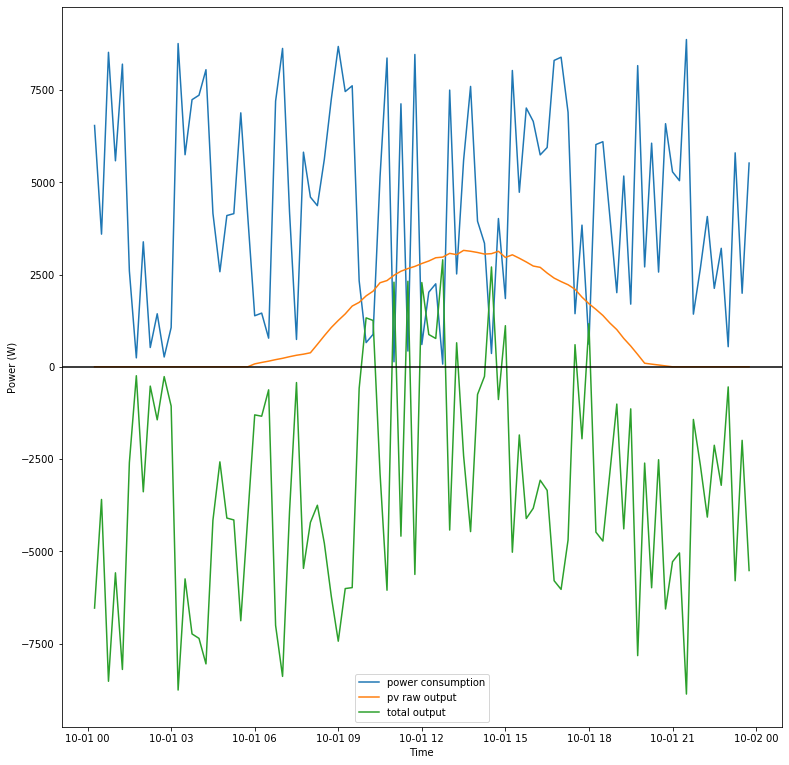

In [6]:
import json
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
'''
Here are the three curves in the same graph.
'''
# Chart size.
plt.rcParams["figure.figsize"] = (10,10)

consumer = pv_simulator.Consumer()
datetime_range = []
meter_output = []
pv_raw_output = []
total_output = []

# For each mocked row, consumer will generate a new output value.
for row in data:
    datetime_range.append(datetime.fromisoformat(row[0]))
    meter_output.append(row[1])
    encoded_payload = json.dumps(dict(zip(headers, row)))
    pv_raw_output.append(int(consumer.get_pv_raw_output_power(row[0])))
    total_output.append(int(consumer.get_pv_output_power(encoded_payload)))

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

# The graphs.
ax.plot(datetime_range, meter_output, label='power consumption')
ax.plot(datetime_range, pv_raw_output, label='pv raw output')
ax.plot(datetime_range, total_output, label='total output')
plt.xlabel("Time")
plt.ylabel("Power (W)")
plt.legend()

'''
The X axis line helps us to see all the intervals where green line crosses the axis.
This are the intervals where the system produced more power that consumed. 
'''
plt.axhline(0, color='black')

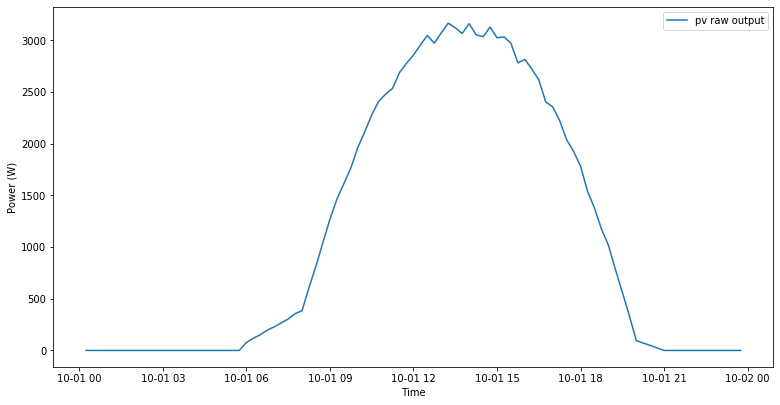

In [4]:
'''
Here is a isolated curve from the raw pv generator.
'''

plt.rcParams["figure.figsize"] = (10,5)

consumer = pv_simulator.Consumer()
datetime_range = []
meter_output = []
pv_raw_output = []
total_output = []

for row in data:
    datetime_range.append(datetime.fromisoformat(row[0]))
    encoded_payload = json.dumps(dict(zip(headers, row)))
    pv_raw_output.append(int(consumer.get_pv_raw_output_power(row[0])))

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(datetime_range, pv_raw_output, label='pv raw output')
plt.xlabel("Time")
plt.ylabel("Power (W)")
plt.legend()